In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_mldata('MNIST original', transpose_data=True, data_home='./scikit-learn-data')

In [5]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [6]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.8)

In [8]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.125750


In [10]:
# Score optimization on test data
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))

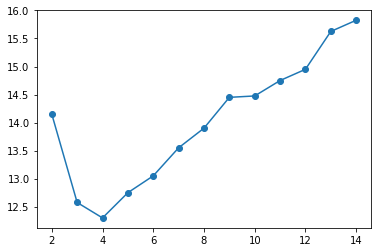

In [11]:
plt.plot(range(2,15), errors, 'o-')
plt.show()

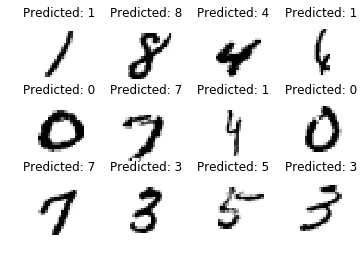

In [12]:
# We recover the best performing classifier
knn = neighbors.KNeighborsClassifier(7)
knn.fit(xtrain, ytrain)

# Predictions on test data are retrieved
predicted = knn.predict(xtest)

# We resize the data as images
images = xtest.reshape((-1, 28, 28))

# We select a sample of 12 random images
select = np.random.randint(images.shape[0], size=12)


# We display the images with the associated prediction
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % predicted[value])

plt.show()

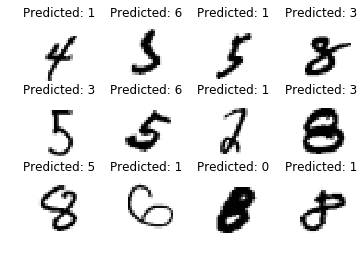

In [13]:
# we recover the badly predicted data
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# we select a sample of these images
select = np.random.randint(misclass_images.shape[0], size=12)

# we display the images and predictions (erroneous) associated with these images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % misclass_predicted[value])

plt.show()